<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Classification/OSA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [954]:
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt


# Plot settings

In [955]:
# # Create a figure with a fixed size of 4 x 3 inches
# plt.rcParams["font.size"] = 10  # Set the default font size to 14
# plt.rcParams["lines.linewidth"] = 2.5  # Set the default line width to 2.5
# plt.rcParams['axes.labelsize'] = 10
# plt.rcParams['xtick.labelsize'] = 10
# plt.rcParams['ytick.labelsize'] = 10
# plt.rcParams['legend.fontsize'] = 10
# plt.rcParams['figure.titlesize'] = 11
# plt.rcParams['xtick.major.size'] = 10
# plt.rcParams['xtick.major.width'] = 1
# plt.rcParams['ytick.major.size'] = 10
# plt.rcParams['ytick.major.width'] = 1
# plt.rcParams['xtick.minor.width'] = 1
# plt.rcParams['ytick.minor.size'] = 5
# plt.rcParams['ytick.minor.width'] = 1
# plt.rcParams['xtick.minor.size'] = 5
# plt.rcParams['figure.figsize'] = 7,4
# sns.set_style('ticks')

**Reading the data**

In [956]:
# Importing the datasets
df     = pd.read_csv('OSA_Data_April_2023.csv')

**Display the data**

In [957]:
df.shape

(1000, 11)

**Drop unwanted data**

In [958]:
df.head()

,Age,Sex,Height,Weight,BMI,Neck,AirwayMF,MF,BAN,AHI,OSA
0,49,0,66.0,127,0,0,1,0,0,0,0
1,42,0,66.0,165,0,0,1,0,0,0,0
2,58,1,68.0,138,0,0,1,0,0,0,0
3,44,0,60.0,118,0,0,1,0,0,0,0
4,55,0,64.0,136,0,0,1,0,0,0,0


In [959]:
df.sample(n = 10)

,Age,Sex,Height,Weight,BMI,Neck,AirwayMF,MF,BAN,AHI,OSA
94,21,1,71.0,260,1,1,3,1,3,2,0
141,55,0,61.0,187,1,0,1,0,1,3,0
948,55,0,68.0,250,1,0,1,0,1,86,1
353,38,0,67.0,280,1,1,1,0,2,11,0
357,37,1,71.0,250,1,1,2,0,2,11,0
515,33,1,73.0,220,0,1,1,0,1,21,1
131,44,1,70.0,180,0,0,1,0,0,3,0
331,41,0,62.0,295,1,1,2,0,2,10,0
336,65,0,65.0,210,1,1,3,1,3,11,0
835,72,1,70.0,197,0,0,2,0,0,58,1


In [960]:
# Drop the first column
# df = df.drop('OSA', axis = 1)

In [961]:
# Drop rows with any NaN values
df = df.dropna()
df = df.drop('AHI', axis = 1)

In [962]:
df.sample(n = 10)

,Age,Sex,Height,Weight,BMI,Neck,AirwayMF,MF,BAN,OSA
448,45,0,51.5,200,1,1,3,1,3,1
276,73,1,62.0,176,1,1,3,1,3,0
807,63,0,68.0,245,1,0,2,0,1,1
343,75,1,72.0,215,0,1,2,0,1,0
454,57,1,71.0,255,1,1,4,1,3,1
50,71,0,62.0,190,1,1,3,1,3,0
623,34,1,66.0,235,1,1,1,0,2,1
527,45,0,60.0,261,1,1,4,1,3,1
847,46,1,74.0,294,1,1,4,1,3,1
643,59,1,68.0,320,1,1,4,1,3,1


In [963]:
ones_count = df['OSA'].value_counts()[1]
print(ones_count)

565


In [964]:
zeros_count = (df['OSA'] == 0).sum()
print(zeros_count)

435


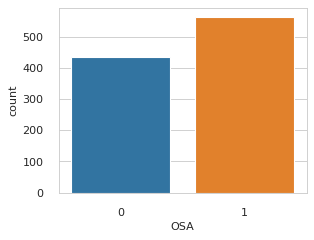

In [965]:
# Create a figure with size 8x6 inches, 80 dots per inch resolution
fig = plt.figure(figsize=(4,3), dpi=80)
# Calculate the number of classes in the class
sns.countplot(data=df, x='OSA')
plt.savefig('classes.png')

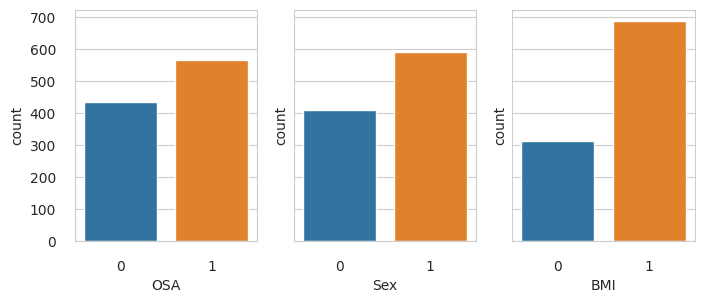

In [966]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1,3,figsize=(8,3),sharey=True)
sns.countplot(ax=axes[0],data=df, x='OSA')
sns.countplot(ax=axes[1],data=df, x='Sex')
sns.countplot(ax=axes[2],data=df, x='BMI')
plt.savefig('Statistics.png')


**Correlation between different variables**

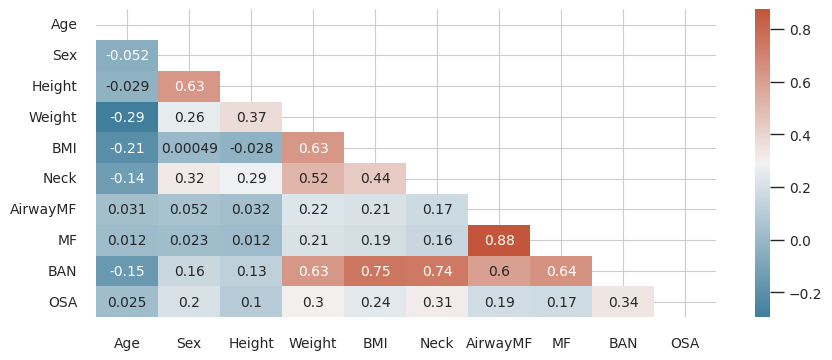

In [967]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 4))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.savefig('Heatmap.png')


In [968]:
from imblearn.over_sampling import RandomOverSampler

# Assuming your DataFrame is called `df` and the target variable is called `Prediction`
X = df.drop('OSA', axis=1)
y = df['OSA']

# Instantiate a RandomOverSampler object
oversampler = RandomOverSampler()

# Fit and transform the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Combine the resampled X and y into a new DataFrame
df = pd.concat([X_resampled, y_resampled], axis=1)


In [969]:
df.shape

(1130, 10)

In [970]:
# # example of random undersampling to balance the class distribution
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# # The class can be used just like the RandomOverSampler class in the 
# # previous section, except the strategies impact the majority class 
# # instead of the minority class. For example, setting the sampling_strategy 
# # argument to “majority” will oversample the majority class determined 
# # by the class with the largest number of examples.

# # define Oversample strategy
# oversample = RandomOverSampler(sampling_strategy='not majority')
# x_over, y_over = oversample.fit_resample(x_data,y_data)

In [971]:
# y_over.value_counts().plot.pie(autopct='%.2f')

In [972]:
# x_over.shape

In [973]:
# X

**Preparing data for machine learning classifier**

In [974]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['OSA'], axis=1), 
                                                    df['OSA'], 
                                                    test_size=0.3, 
                                                    random_state=42)

**Feature selection**

In [975]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

# Apply feature selection using SelectKBest and F-test
# We apply feature selection using SelectKBest and F-test, which selects the top 5 features based on their importance. 

selector  = SelectKBest(f_classif, k=7)
x_train    = selector.fit_transform(X_train, Y_train)
x_test     = selector.transform(X_test)

y_train = Y_train
y_test  = Y_test

In [976]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Get the selected feature names
selected_feature_names = X_train.columns[selector.get_support()]

print(selected_feature_names)

Index(['Sex', 'Weight', 'BMI', 'Neck', 'AirwayMF', 'MF', 'BAN'], dtype='object')


In [977]:
# sns.pairplot(df, vars=['Weight (lb)', 'BAN', 'AHI','OSA'])
# plt.savefig('Correction with OSA.png')

In [978]:
X_train[selected_feature_names].head()

,Sex,Weight,BMI,Neck,AirwayMF,MF,BAN
481,0,246,1,1,2,0,2
436,1,300,1,1,4,1,3
700,1,340,1,1,3,1,3
602,0,238,1,1,2,0,2
65,0,245,1,1,3,1,3


**Scaling the data**

In [979]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [980]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

def calculate_confusion(clf_name, y_train, y_pred_train, y_test, y_pred_test):
 
    # Calculate accuracy, precision, recall, and F1 score for training and testing sets
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    train_prec = precision_score(y_train, y_pred_train)
    test_prec = precision_score(y_test, y_pred_test)
    train_rec = recall_score(y_train, y_pred_train)
    test_rec = recall_score(y_test, y_pred_test)
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)
    
    # Calculate the confusion matrix for training and testing sets
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)

    # Create a 1x2 figure with the confusion matrix on the left and evaluation metrics on the right
    fig, axs = plt.subplots(1, 2, figsize=(8,3),sharey=True)
    
    # Plot the confusion matrix for training set
    sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g', ax=axs[0],annot_kws={"size": 13})
    axs[0].set_title('Training Set Confusion Matrix',fontsize=8)
    axs[0].set_xlabel('Predicted Labels',fontsize=8)
    axs[0].set_ylabel('True Labels',fontsize=8)
    
    # Plot the confusion matrix for testing set
    sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g', ax=axs[1],annot_kws={"size": 13})
    axs[1].set_title('Testing Set Confusion Matrix',fontsize=8)
    axs[1].set_xlabel('Predicted Labels',fontsize=8)
    axs[1].set_ylabel('True Labels',fontsize=8)
    
    # Add a main title to the figure
    fig.suptitle(f'Confusion matrix using {clf_name} ', fontsize=11, y=1.05)
    plt.savefig(clf_name + ".png")
    # Show the plot
    plt.show()

    # Define the performance metrics for training and testing cases
    train_metrics = ["Train Accuracy", "Train Precision", "Train Recall", "Train F1"]
    test_metrics = ["Test Accuracy", "Test Precision", "Test Recall", "Test F1"]

    # Create a list of lists containing the metrics
    table = [train_metrics + test_metrics,
         [train_acc, train_prec, train_rec, train_f1, test_acc, test_prec, test_rec, test_f1]]

    # Print the table
    print(tabulate(table, headers='firstrow'))

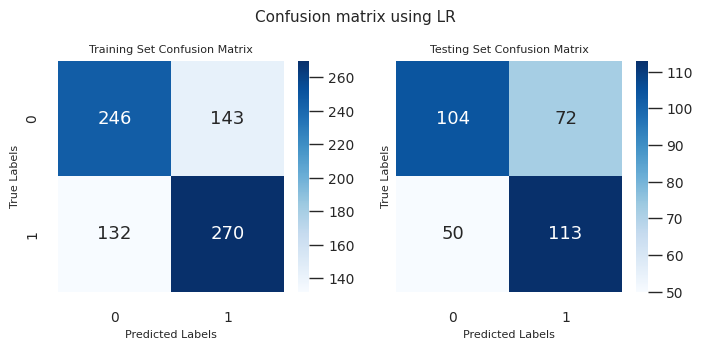

  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.652339           0.653753        0.671642    0.662577         0.640118          0.610811       0.693252   0.649425


In [981]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# We now prepare our selected models
models  = []
results = []
names   = []
scoring = 'accuracy'
names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', max_iter=20)
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(lr, x_test, y_test)
results.append(cv_results)  

In [982]:
# Compute False postive rate, and True positive rate
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, lr.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc1 = metrics.roc_auc_score(y_train,lr.predict(x_train))

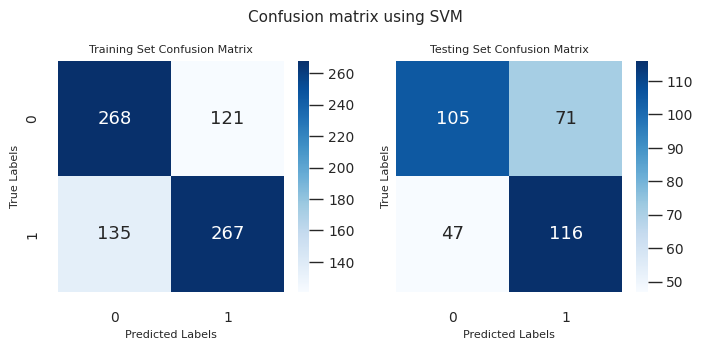

  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.676359           0.688144        0.664179    0.675949         0.651917          0.620321       0.711656   0.662857


In [983]:
#SVM ####################################
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)
calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(svm, x_test, y_test)
results.append(cv_results)

In [984]:
# Compute False postive rate, and True positive rate
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, svm.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc2 = metrics.roc_auc_score(y_train,svm.predict(x_train))

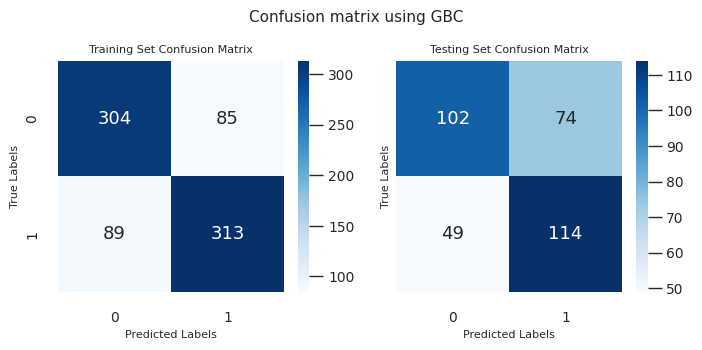

  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.780025           0.786432        0.778607      0.7825         0.637168          0.606383       0.699387   0.649573


In [985]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test  = GBC.predict(x_test)
calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GBC, x_test, y_test)
results.append(cv_results)

In [986]:
# Compute False postive rate, and True positive rate
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_train, GBC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc3 = metrics.roc_auc_score(y_train,GBC.predict(x_train))

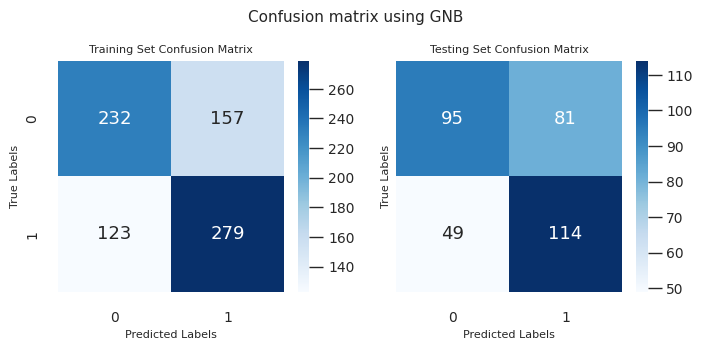

  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.646018           0.639908         0.69403    0.665871         0.616519          0.584615       0.699387   0.636872


In [987]:
#GaussianNB
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB(priors=None, var_smoothing=1e-9)
GNB.fit(x_train, y_train)

# Adjust classification threshold to 0.3
y_pred_train = GNB.predict(x_train)
# y_pred_train = (y_pred_train >= 0.1).astype(int)

y_pred_test  = GNB.predict(x_test)
# y_pred_test = (y_pred_test >= 0.1).astype(int)

calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GNB, x_test, y_test)
results.append(cv_results)

In [988]:
# Compute False postive rate, and True positive rate
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_train, GNB.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc4 = metrics.roc_auc_score(y_train,GNB.predict(x_train))

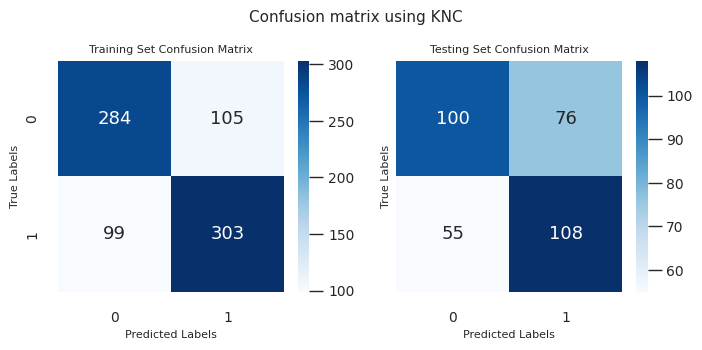

  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.742099           0.742647        0.753731    0.748148         0.613569          0.586957       0.662577   0.622478


In [989]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)
calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(KNC, x_test, y_test)
results.append(cv_results)

In [990]:
# Compute False postive rate, and True positive rate
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_train, KNC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc5 = metrics.roc_auc_score(y_train,KNC.predict(x_train))

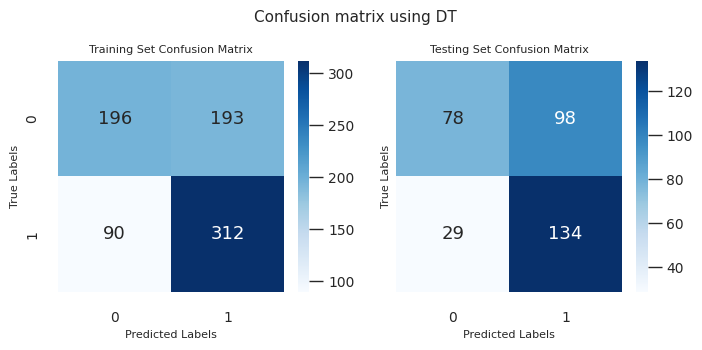

  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.642225           0.617822        0.776119    0.687982         0.625369          0.577586       0.822086   0.678481


In [991]:
# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,ccp_alpha=0.01)
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)
calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(DT, x_test, y_test)
results.append(cv_results)

In [992]:
# Compute False postive rate, and True positive rate
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_train, DT.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc6 = metrics.roc_auc_score(y_train,DT.predict(x_train))

In [993]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data = export_graphviz(DT, out_file=None, 
                           feature_names=selected_feature_names,  
                           class_names='OSA',  
                           filled=True, rounded=True,  
                           special_characters=True)

# Plot the decision tree using graphviz
graph = graphviz.Source(dot_data)

# Render the graph as a PNG image
graph.format = 'png'
graph.render('Decision_Tree', view=False)

# graph.render("Decision_Tree", format="png")  # Save the tree to a file
graph.view()  # Open the tree visualization in a viewer


'Decision_Tree.png'

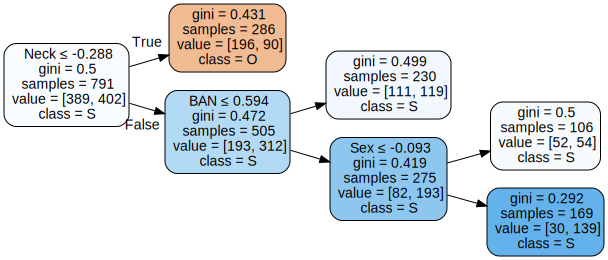

In [994]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Export the tree as a Graphviz dot file
dot_data = export_graphviz(DT, out_file=None, feature_names=selected_feature_names,
                           class_names='OSA', filled=True, rounded=True,
                           special_characters=True, rotate=True)

# Create a graph from the dot file
graph = graphviz.Source(dot_data)

# Render the graph as a PNG image
graph.format = 'png'
graph.render('decision tree', view=False)

# Display the graph
graph

# Save the graph as a PNG file
# graph.format = 'png'
# graph.render('Decision_Tree')

# # Plot the decision tree
# fig, ax = plt.subplots(figsize=(8,8))
# plot_tree(DT, ax=ax)
# plt.savefig('Decision_Tree.png')
# plt.show()

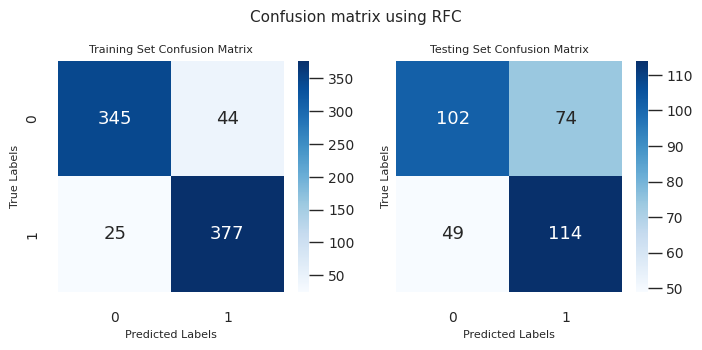

  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.912769           0.895487        0.937811     0.91616         0.637168          0.606383       0.699387   0.649573


In [995]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# RFC = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=np.sqrt(X_train.shape[1]), random_state=42)
RFC = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)
calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(RFC, x_test, y_test)
results.append(cv_results)

In [996]:
# Compute False postive rate, and True positive rate
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_train, RFC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc7 = metrics.roc_auc_score(y_train,RFC.predict(x_train))

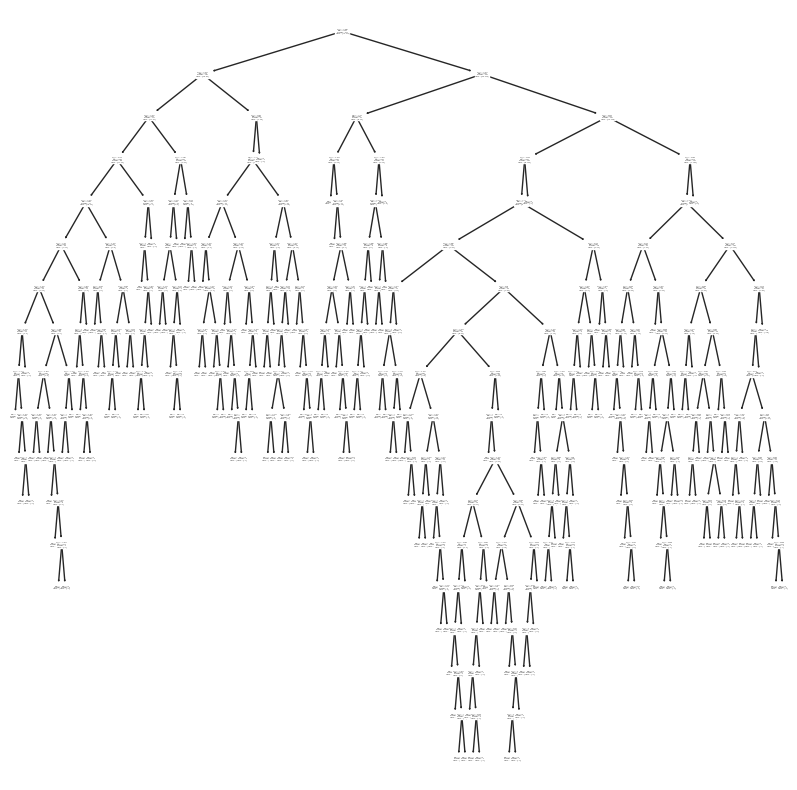

In [997]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Choose the best tree from the forest based on mean decrease impurity
best_tree_index = RFC.feature_importances_.argmax()

# Plot the best tree in the forest
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(RFC.estimators_[best_tree_index], ax=ax)
plt.show()

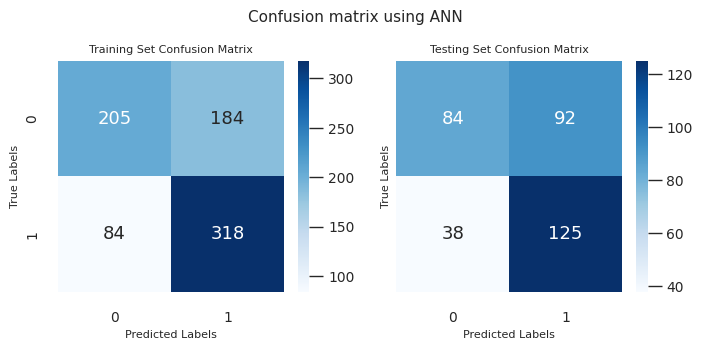

  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.661188           0.633466        0.791045     0.70354         0.616519          0.576037       0.766871   0.657895


In [998]:
#Artificial Neural Network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='adam', max_iter= 1000, alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(x_train, y_train)
y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)
calculate_confusion("ANN",y_train, y_pred_train, y_test, y_pred_test)
fpr8, tpr8, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(ANN, x_test, y_test)
results.append(cv_results)

In [999]:
# Compute False postive rate, and True positive rate
fpr8, tpr8, thresholds8 = metrics.roc_curve(y_train, ANN.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc8 = metrics.roc_auc_score(y_train,ANN.predict(x_train))

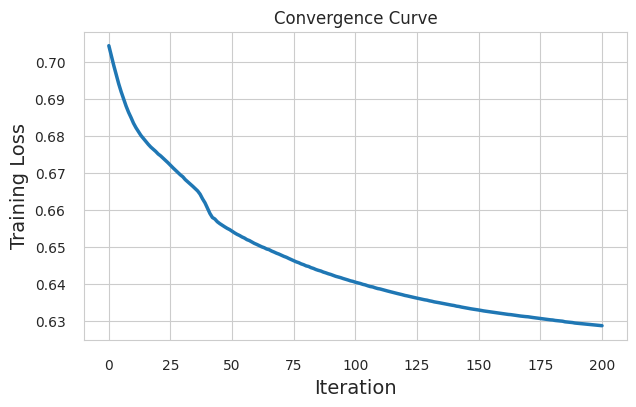

In [1000]:
# Get the training loss values at each iteration
loss_values = ANN.loss_curve_

# Plot the convergence curve
plt.plot(loss_values)
plt.grid(True)
plt.title('Convergence Curve')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Training Loss', fontsize=14)
plt.savefig('ANN_convergence.png')
plt.show()

<Figure size 800x400 with 0 Axes>

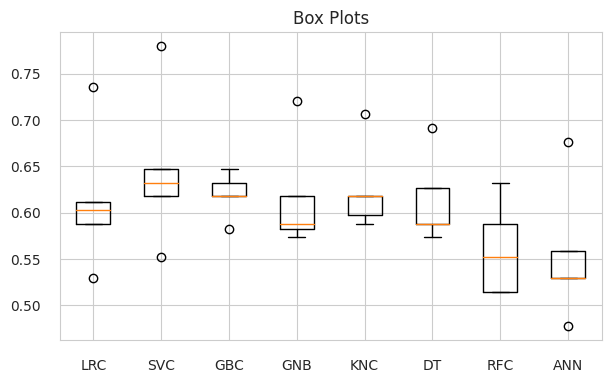

In [1001]:
names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN']
fig = plt.figure(figsize=(8,4))
fig.suptitle('Model Comparison')
# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1)
# Draw the box plots
ax.boxplot(results)
# Set the labels for each box plot
ax.set_xticklabels(names)
# Add a title to the plot
ax.set_title('Box Plots')
# Show the plot
plt.show()

In [1002]:
auc1

0.6520162682730308

In [1003]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the FPR and TPR values for each algorithm as arrays
# np.array(['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN'])
# fpr = [fpr1,fpr2,fpr3,fpr4,fpr5,fpr6,fpr7,fpr8]
# tpr = [tpr1,tpr2,tpr3,tpr4,tpr5,tpr6,tpr7,tpr8]
# auc = [auc1,auc2,auc3,auc4,auc5,auc6,auc7,auc8]

# # Plot the ROC curve for each algorithm
# plt.figure(figsize=(8, 4))
# # Create plot
# for i in range(len(fpr)):
#     label_str = f"{names[i]} AUC = {auc[i]:.2f}"
#     plt.plot(fpr[i], tpr[i], label=label_str)

# # Set the axis labels and title
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('ROC Curve')

# # Set the axis limits
# plt.xlim([0, 1])
# plt.ylim([0, 1])

# # Add a legend
# plt.legend()

# # Show the plot
# plt.show()

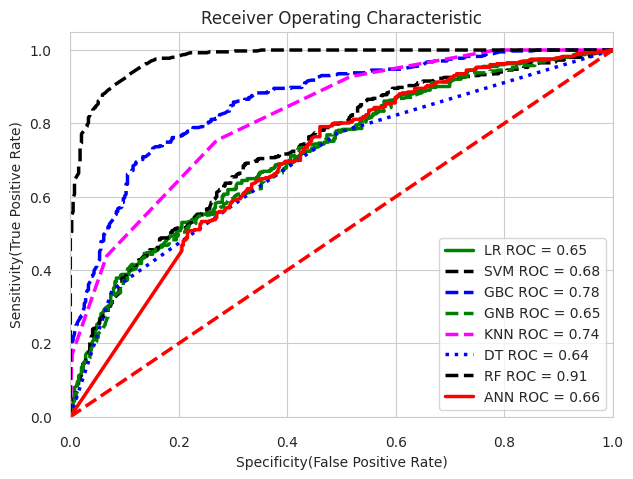

In [1004]:
# Now, plot the computed values
fig = plt.figure(figsize=(7,5))

plt.plot(fpr1, tpr1, linestyle='-',color='green', label='LR ROC = %.2f' %auc1)
plt.plot(fpr2, tpr2, linestyle='--',color='black', label='SVM ROC = %.2f' %auc2)
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='GBC ROC = %.2f' %auc3)
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='GNB ROC = %.2f' %auc4)
plt.plot(fpr5, tpr5, linestyle='--',color='magenta', label='KNN ROC = %.2f' %auc5)
plt.plot(fpr6, tpr6, linestyle=':',color='blue', label='DT ROC = %.2f' %auc6)
plt.plot(fpr7, tpr7, linestyle='--',color='black', label='RF ROC = %.2f' %auc7)
plt.plot(fpr8, tpr8,linestyle='-',color='red', label='ANN ROC = %.2f' %auc8)

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curves.png')
plt.show()   # Display